In [96]:
import numpy as np
import pandas as pd
from pandas import read_excel
#import DatetimeIndex
import sklearn
import random
from pandas import datetime
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller, acf, pacf, grangercausalitytests
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [97]:
random.seed(1001)
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
training_data = pd.read_excel("ML_BTC_Training_DATA.xlsx", skiprows=1, parse_dates = [1])
training_data.columns = ['Date','Match Column','BTC Price','BTC in circulation','Market Cap',
                        'Total Trade(USD)','Block Size(MB)','Avg Block Size(MB)','Avg # Of Transactions',
                         'Median Confirmation Time(Min)',
                        'Hash Rate','Difficulty','Mining Revenue($)', 'Transaction Fee(BTC)',
                        'Transaction Fee($)','Cost % of Transaction Volume','Cost per Transaction',
                        'Unique Addresses','Transaction per Day','Total Transaction','Transaction Rate',
                        'Mempool Count','Mempool Growth','Mempool Size','Unspent Transaction',
                        'Transactions Exc First 100','Transactions Exc Long Chains','Transaction Amount (BTC)',
                        'Estimated Transaction Value','Estimated Transaction Value($)','Tether Volume',
                        'ETH Price','ETH Volume','XRP Price','XRP Volume','LTC Price','LTC Volume',
                        'S&P 500','XAU($)']

test_data = pd.read_excel("ML_BTC_Test_DATA.xlsx", skiprows=1, parse_dates = [1])
test_data.columns = ['Date','Match Column','BTC Price','BTC in circulation','Market Cap',
                        'Total Trade(USD)','Block Size(MB)','Avg Block Size(MB)','Avg # Of Transactions',
                         'Median Confirmation Time(Min)',
                        'Hash Rate','Difficulty','Mining Revenue($)', 'Transaction Fee(BTC)',
                        'Transaction Fee($)','Cost % of Transaction Volume','Cost per Transaction',
                        'Unique Addresses','Transaction per Day','Total Transaction','Transaction Rate',
                        'Mempool Count','Mempool Growth','Mempool Size','Unspent Transaction',
                        'Transactions Exc First 100','Transactions Exc Long Chains','Transaction Amount (BTC)',
                        'Estimated Transaction Value','Estimated Transaction Value($)','Tether Volume',
                        'ETH Price','ETH Volume','XRP Price','XRP Volume','LTC Price','LTC Volume',
                        'S&P 500','XAU($)']

In [98]:
data = pd.read_excel("ML_BTC_DATA.xlsx", skiprows=1, parse_dates = [1])
data.columns = ['Date','Match Column','BTC Price','BTC in circulation','Market Cap',
                        'Total Trade(USD)','Block Size(MB)','Avg Block Size(MB)','Avg # Of Transactions',
                         'Median Confirmation Time(Min)',
                        'Hash Rate','Difficulty','Mining Revenue($)', 'Transaction Fee(BTC)',
                        'Transaction Fee($)','Cost % of Transaction Volume','Cost per Transaction',
                        'Unique Addresses','Transaction per Day','Total Transaction','Transaction Rate',
                        'Mempool Count','Mempool Growth','Mempool Size','Unspent Transaction',
                        'Transactions Exc First 100','Transactions Exc Long Chains','Transaction Amount (BTC)',
                        'Estimated Transaction Value','Estimated Transaction Value($)','Tether Volume',
                        'ETH Price','ETH Volume','XRP Price','XRP Volume','LTC Price','LTC Volume',
                        'S&P 500','XAU($)']

In [99]:
price_btc = training_data['BTC Price']
price_btc_test = test_data['BTC Price']

In [100]:
series_list = ['BTC in circulation','Market Cap',
                        'Total Trade(USD)','Block Size(MB)','Avg Block Size(MB)','Avg # Of Transactions',
                         'Median Confirmation Time(Min)',
                        'Hash Rate','Difficulty','Mining Revenue($)', 'Transaction Fee(BTC)',
                        'Transaction Fee($)','Cost % of Transaction Volume','Cost per Transaction',
                        'Unique Addresses','Transaction per Day','Total Transaction','Transaction Rate',
                        'Mempool Count','Mempool Growth','Mempool Size','Unspent Transaction',
                        'Transactions Exc First 100','Transactions Exc Long Chains','Transaction Amount (BTC)',
                        'Estimated Transaction Value','Estimated Transaction Value($)','Tether Volume',
                        'ETH Price','ETH Volume','XRP Price','XRP Volume','LTC Price','LTC Volume',
                        'S&P 500','XAU($)']
diff_amt = list()
i = 0
for s in series_list:
    a = 0
    i = 0
    td = training_data[s]
    td.dropna(inplace = True)
    X = td.values
    while (i == 0):
        td.dropna(inplace = True)
        X = td
        result = adfuller(X)
        if (result[0] < result[4].get("1%")):
            diff_amt.append(a)
            i=1
        else:
            a=a+1
            training_data[s] = training_data[s].diff()
            td = training_data[s]
            X = td.values

In [101]:
training_data['lag_CostPerTran'] = training_data['Cost per Transaction'].shift()
training_data['lag_XRPPrice'] = training_data['XRP Price'].shift()
training_data['lag_XRPVol'] = training_data['XRP Volume'].shift()

In [102]:
modelC = SARIMAX(endog=training_data['BTC Price'][2:], exog=training_data[['lag_CostPerTran']][2:], order=[1,1,1])
resultsC = modelC.fit(maxiter=200, method='nm')
print(resultsC.summary())

Optimization terminated successfully.
         Current function value: 7.318446
         Iterations: 154
         Function evaluations: 266
                           Statespace Model Results                           
Dep. Variable:              BTC Price   No. Observations:                  728
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -5327.829
Date:                Sun, 01 Dec 2019   AIC                          10663.658
Time:                        16:54:58   BIC                          10682.013
Sample:                             0   HQIC                         10670.741
                                - 728                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
lag_CostPerTran     1.1132      0.812      1.371      0.170 

In [103]:
modelXP = SARIMAX(endog=training_data['BTC Price'][2:], exog=training_data[['lag_XRPPrice']][2:], order=[1,1,1])
resultsXP = modelXP.fit(maxiter=200, method='nm')
print(resultsXP.summary())

Optimization terminated successfully.
         Current function value: 7.314113
         Iterations: 175
         Function evaluations: 297
                           Statespace Model Results                           
Dep. Variable:              BTC Price   No. Observations:                  728
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -5324.674
Date:                Sun, 01 Dec 2019   AIC                          10657.348
Time:                        16:55:01   BIC                          10675.704
Sample:                             0   HQIC                         10664.431
                                - 728                                         
Covariance Type:                  opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
lag_XRPPrice   383.5769     53.783      7.132      0.000     278.1

In [104]:
modelXV = SARIMAX(endog=training_data['BTC Price'][2:], exog=training_data[['lag_XRPVol']][2:], order=[1,1,1])
resultsXV = modelXV.fit(maxiter=200, method='nm')
print(resultsXV.summary())

Optimization terminated successfully.
         Current function value: 7.291622
         Iterations: 139
         Function evaluations: 241
                           Statespace Model Results                           
Dep. Variable:              BTC Price   No. Observations:                  728
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -5308.301
Date:                Sun, 01 Dec 2019   AIC                          10624.601
Time:                        16:55:08   BIC                          10642.957
Sample:                             0   HQIC                         10631.685
                                - 728                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
lag_XRPVol -1.023e-07   8.16e-09    -12.531      0.000   -1.18e-07   -

In [105]:
#Create differenced full dataset for Total Trade(USD)
data['Cost per Transaction'] = data['Cost per Transaction'].diff()
data['lag_CostPerTran'] = data['Cost per Transaction'].shift()

data['XRP Price'] = data['XRP Price'].diff()
data['lag_XRPPrice'] = data['XRP Price'].shift()

data['XRP Volume'] = data['XRP Volume'].diff()
data['lag_XRPVol'] = data['XRP Volume'].shift()

Optimization terminated successfully.
         Current function value: 7.219873
         Iterations: 137
         Function evaluations: 230
Average Error:
243.74524798816284
Test MSE: 60834.406


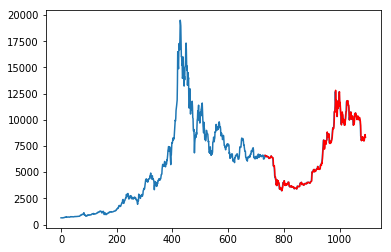

In [110]:
#Creating Predictions using ARIMA Forecasting
history = [x for x in price_btc]
predictions = list()
error_list = list()
endog = data['BTC Price'][2:]
exog = data[['lag_CostPerTran']][2:]
modelC = SARIMAX(endog=endog, exog=exog, order=[1,1,1])
model_fit = modelC.fit(maxiter=200, method='nm')
output = model_fit.predict(start=731)

error_list = list()
for i in range(len(output)):
    error_list.append(abs(output.get(733+i) - price_btc_test[i]))
#average error
print("Average Error:")
print(sum(error_list)/len(error_list))
error = mean_squared_error(data['BTC Price'][733:], output)
print('Test MSE: %.3f' % error)
plt.plot(data['BTC Price'])
plt.plot(output, color='red')
plt.show()

Optimization terminated successfully.
         Current function value: 7.216172
         Iterations: 147
         Function evaluations: 257
Average Error:
245.3337044257866
Test MSE: 60846.867


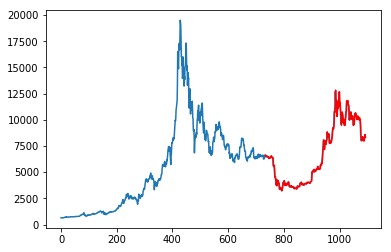

In [111]:
#Creating Predictions using ARIMA Forecasting
history = [x for x in price_btc]
predictions = list()
error_list = list()
endog = data['BTC Price'][2:]
exog = data[['lag_XRPPrice']][2:]
modelXP = SARIMAX(endog=endog, exog=exog, order=[1,1,1])
model_fit = modelXP.fit(maxiter=200, method='nm')
output = model_fit.predict(start=731)

error_list = list()
for i in range(len(output)):
    error_list.append(abs(output.get(733+i) - price_btc_test[i]))
#average error
print("Average Error:")
print(sum(error_list)/len(error_list))
error = mean_squared_error(data['BTC Price'][733:], output)
print('Test MSE: %.3f' % error)
plt.plot(data['BTC Price'])
plt.plot(output, color='red')
plt.show()

Optimization terminated successfully.
         Current function value: 7.200168
         Iterations: 113
         Function evaluations: 203
Average Error:
248.0160266652389
Test MSE: 61540.787


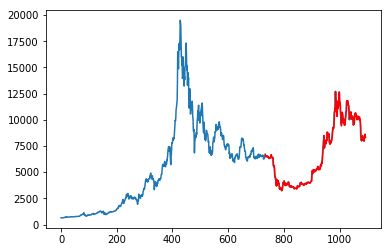

In [112]:
#Creating Predictions using ARIMA Forecasting
history = [x for x in price_btc]
predictions = list()
error_list = list()
endog = data['BTC Price'][2:]
exog = data[['lag_XRPVol']][2:]
modelXV = SARIMAX(endog=endog, exog=exog, order=[1,1,1])
model_fit = modelXV.fit(maxiter=200, method='nm')
output = model_fit.predict(start=731)

error_list = list()
for i in range(len(output)):
    error_list.append(abs(output.get(733+i) - price_btc_test[i]))
#average error
print("Average Error:")
print(sum(error_list)/len(error_list))
error = mean_squared_error(data['BTC Price'][733:], output)
print('Test MSE: %.3f' % error)
plt.plot(data['BTC Price'])
plt.plot(output, color='red')
plt.show()